# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\taula\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key = api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(
    q='bitcoin',
    language='en'
)

In [5]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(
    q='ethereum',
    language='en'
)

In [6]:
# Create the Bitcoin sentiment scores DataFrame

bitcoin_sentiments = []

for article in btc_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

bitcoin_df = pd.DataFrame(bitcoin_sentiments)
cols = ["compound", "negative", "neutral", "positive", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,compound,negative,neutral,positive,text
0,0.6908,0.000,0.822,0.178,"Like Dogecoin devotees, the mayor of Reno, and..."
1,-0.5719,0.184,0.705,0.111,Filed under:\r\nThe supply chain attack has re...
2,-0.6124,0.143,0.857,0.000,image copyrightGetty Images\r\nThe gang behind...
3,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...
4,0.2732,0.000,0.903,0.097,"As longtime TechCrunch readers know well, Mich..."


In [7]:
# Create the Ethereum sentiment scores DataFrame

ethereum_sentiments = []

for article in eth_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

ethereum_df = pd.DataFrame(ethereum_sentiments)
cols = ["compound", "negative", "neutral", "positive", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,compound,negative,neutral,positive,text
0,0.3612,0.000,0.925,0.075,There are many blockchain platforms competing ...
1,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...
2,0.3612,0.041,0.849,0.110,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...
3,0.6369,0.000,0.843,0.157,"""Anthony Di Iorio, a co-founder of the Ethereu..."
4,0.7717,0.000,0.806,0.194,"Ether holders have ""staked"" more than $13 bill..."


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,-0.012620,0.038250,0.919350,0.042350
std,0.354298,0.055168,0.087459,0.062486
min,-0.612400,0.000000,0.705000,0.000000
25%,-0.095450,0.000000,0.840250,0.000000
50%,0.000000,0.000000,0.920000,0.000000
75%,0.108475,0.076250,1.000000,0.099000
max,0.726400,0.184000,1.000000,0.178000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.255185,0.016850,0.908250,0.074900
std,0.342762,0.030824,0.075962,0.071082
min,-0.381800,0.000000,0.782000,0.000000
25%,0.000000,0.000000,0.842750,0.000000
50%,0.305600,0.000000,0.920000,0.077500
75%,0.528675,0.010250,1.000000,0.149250
max,0.771700,0.080000,1.000000,0.194000


### Questions:

## Q: Which coin had the highest mean positive score?

A: ETH has the highest mean positive score of 0.0787 while BTC is at 0.0557. 

## Q: Which coin had the highest compound score?

A: ETH has the highest compound score of 0.7717 while BTC is at 0.7264. 

## Q. Which coin had the highest positive score?

A: ETH has the highest compound score of 0.1940 while BTC is at 0.1780. 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('punkt')
nltk.download()
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\taula\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\taula\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean.lower())
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    words = [word for word in words if word not in sw]
    
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

tokenizer(bitcoin_df.iloc[0]['text'])

['like',
 'dogecoin',
 'devotee',
 'mayor',
 'reno',
 'leader',
 'el',
 'salvador',
 'aldo',
 'baoicchi',
 'convinced',
 'cryptocurrency',
 'future',
 'ceo',
 'founder',
 'canadian',
 'scooter',
 'maker',
 'daymak',
 'belief',
 '4116',
 'char']

In [13]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df

,compound,negative,neutral,positive,text,tokens
0,0.6908,0.000,0.822,0.178,"Like Dogecoin devotees, the mayor of Reno, and...","[like, dogecoin, devotee, mayor, reno, leader,..."
1,-0.5719,0.184,0.705,0.111,Filed under:\r\nThe supply chain attack has re...,"[filed, underthe, supply, chain, attack, ha, r..."
2,-0.6124,0.143,0.857,0.000,image copyrightGetty Images\r\nThe gang behind...,"[image, copyrightgetty, imagesthe, gang, behin..."
3,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...,"[retail, investor, grew, comfortable, buying, ..."
4,0.2732,0.000,0.903,0.097,"As longtime TechCrunch readers know well, Mich...","[longtime, techcrunch, reader, know, well, mic..."
5,0.2023,0.058,0.833,0.108,"LONDON, June 23 (Reuters) - El Salvador is det...","[london, june, 23, reuters, el, salvador, dete..."
6,0.2023,0.057,0.838,0.105,"LONDON, June 23 (Reuters) - El Salvador is det...","[london, june, 23, reuters, el, salvador, dete..."
7,0.0772,0.075,0.841,0.084,This story originally appeared on MarketBeatWh...,"[story, originally, appeared, marketbeatwhen, ..."
8,0.0000,0.000,1.000,0.000,A representation of virtual currency Bitcoin i...,"[representation, virtual, currency, bitcoin, s..."
9,0.0000,0.000,1.000,0.000,A representation of the virtual cryptocurrency...,"[representation, virtual, cryptocurrency, bitc..."


In [14]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df['text'].apply(tokenizer)
ethereum_df

,compound,negative,neutral,positive,text,tokens
0,0.3612,0.000,0.925,0.075,There are many blockchain platforms competing ...,"[many, blockchain, platform, competing, invest..."
1,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...,"[retail, investor, grew, comfortable, buying, ..."
2,0.3612,0.041,0.849,0.110,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,"[bitcoin, ethereumyuriko, nakaoether, overtook..."
3,0.6369,0.000,0.843,0.157,"""Anthony Di Iorio, a co-founder of the Ethereu...","[anthony, di, iorio, cofounder, ethereum, netw..."
4,0.7717,0.000,0.806,0.194,"Ether holders have ""staked"" more than $13 bill...","[ether, holder, staked, 13, billion, worth, cr..."
5,0.6249,0.000,0.850,0.150,Ether is the cryptocurrency of the ethereum ne...,"[ether, cryptocurrency, ethereum, networkphoto..."
6,0.4019,0.000,0.920,0.080,Major upgrades to the ethereum network could h...,"[major, upgrade, ethereum, network, could, hel..."
7,0.4939,0.000,0.914,0.086,You’ve likely seen the headlines surrounding t...,"[youve, likely, seen, headline, surrounding, p..."
8,0.0000,0.000,1.000,0.000,While the ambitions of crypto investors have s...,"[ambition, crypto, investor, swelled, even, fa..."
9,0.5346,0.000,0.842,0.158,Personal Finance Insider writes about products...,"[personal, finance, insider, writes, product, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
def get_token(df):
    tokens = []
    for i in df['tokens']:
        tokens.extend(i)
    return tokens

btc_tokens = get_token(bitcoin_df)

def bigram_counter(tokens, N):
    words_count = dict(Counter(ngrams(tokens, n = N)))
    return words_count

bigram_btc = bigram_counter(btc_tokens, 2)
bigram_btc

{('like', 'dogecoin'): 1,
 ('dogecoin', 'devotee'): 1,
 ('devotee', 'mayor'): 1,
 ('mayor', 'reno'): 1,
 ('reno', 'leader'): 1,
 ('leader', 'el'): 1,
 ('el', 'salvador'): 3,
 ('salvador', 'aldo'): 1,
 ('aldo', 'baoicchi'): 1,
 ('baoicchi', 'convinced'): 1,
 ('convinced', 'cryptocurrency'): 1,
 ('cryptocurrency', 'future'): 1,
 ('future', 'ceo'): 1,
 ('ceo', 'founder'): 1,
 ('founder', 'canadian'): 1,
 ('canadian', 'scooter'): 1,
 ('scooter', 'maker'): 1,
 ('maker', 'daymak'): 1,
 ('daymak', 'belief'): 1,
 ('belief', '4116'): 1,
 ('4116', 'char'): 1,
 ('char', 'filed'): 1,
 ('filed', 'underthe'): 1,
 ('underthe', 'supply'): 1,
 ('supply', 'chain'): 1,
 ('chain', 'attack'): 1,
 ('attack', 'ha'): 2,
 ('ha', 'reached'): 1,
 ('reached', 'thousand'): 1,
 ('thousand', 'organizationsillustration'): 1,
 ('organizationsillustration', 'alex'): 1,
 ('alex', 'castro'): 1,
 ('castro', 'vergethree'): 1,
 ('vergethree', 'day'): 1,
 ('day', 'ransomware'): 1,
 ('ransomware', 'attacker'): 1,
 ('attacker'

In [17]:
# Generate the Ethereum N-grams where N=2
eth_tokens = get_token(ethereum_df)
bigram_eth = bigram_counter(eth_tokens, 2)
bigram_eth

{('many', 'blockchain'): 1,
 ('blockchain', 'platform'): 1,
 ('platform', 'competing'): 1,
 ('competing', 'investor'): 1,
 ('investor', 'developer'): 1,
 ('developer', 'attention'): 1,
 ('attention', 'right'): 1,
 ('right', 'big'): 1,
 ('big', 'daddy'): 1,
 ('daddy', 'ethereum'): 1,
 ('ethereum', 'socalled'): 1,
 ('socalled', 'ethereum'): 1,
 ('ethereum', 'killer'): 1,
 ('killer', 'like'): 1,
 ('like', 'solana'): 1,
 ('solana', 'wrote'): 1,
 ('wrote', '2563'): 1,
 ('2563', 'char'): 1,
 ('char', 'retail'): 1,
 ('retail', 'investor'): 1,
 ('investor', 'grew'): 1,
 ('grew', 'comfortable'): 1,
 ('comfortable', 'buying'): 1,
 ('buying', 'cryptocurrencies'): 1,
 ('cryptocurrencies', 'like'): 1,
 ('like', 'bitcoin'): 1,
 ('bitcoin', 'ethereum'): 2,
 ('ethereum', '2021'): 1,
 ('2021', 'decentralized'): 1,
 ('decentralized', 'application'): 1,
 ('application', 'world'): 1,
 ('world', 'still'): 1,
 ('still', 'ha'): 1,
 ('ha', 'lot'): 1,
 ('lot', 'work'): 1,
 ('work', 'come'): 1,
 ('come', 'onboa

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_tokens, 10)

[('char', 20),
 ('bitcoin', 20),
 ('reuters', 15),
 ('june', 8),
 ('representation', 8),
 ('illustration', 8),
 ('2021', 7),
 ('seen', 7),
 ('taken', 7),
 ('cryptocurrency', 6)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_tokens, 10)

[('char', 20),
 ('bitcoin', 12),
 ('ethereum', 10),
 ('cryptocurrency', 10),
 ('reuters', 7),
 ('2021', 5),
 ('world', 5),
 ('network', 5),
 ('seen', 4),
 ('investor', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

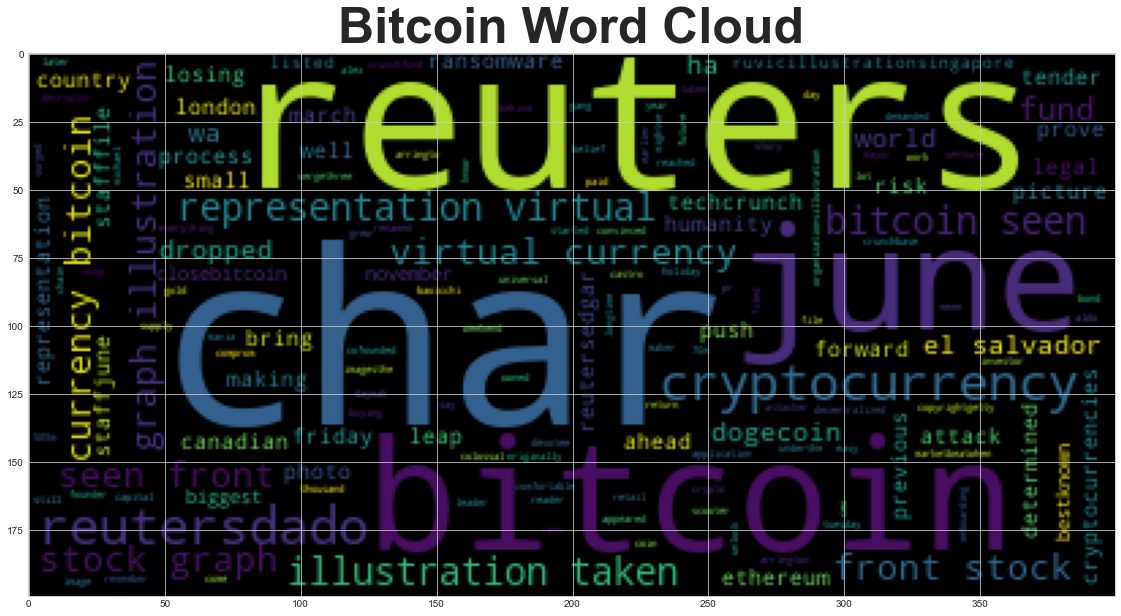

In [22]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(' '.join(btc_tokens))
plt.title("Bitcoin Word Cloud", fontsize = 50, fontweight = 'bold')
plt.imshow(btc_wc)

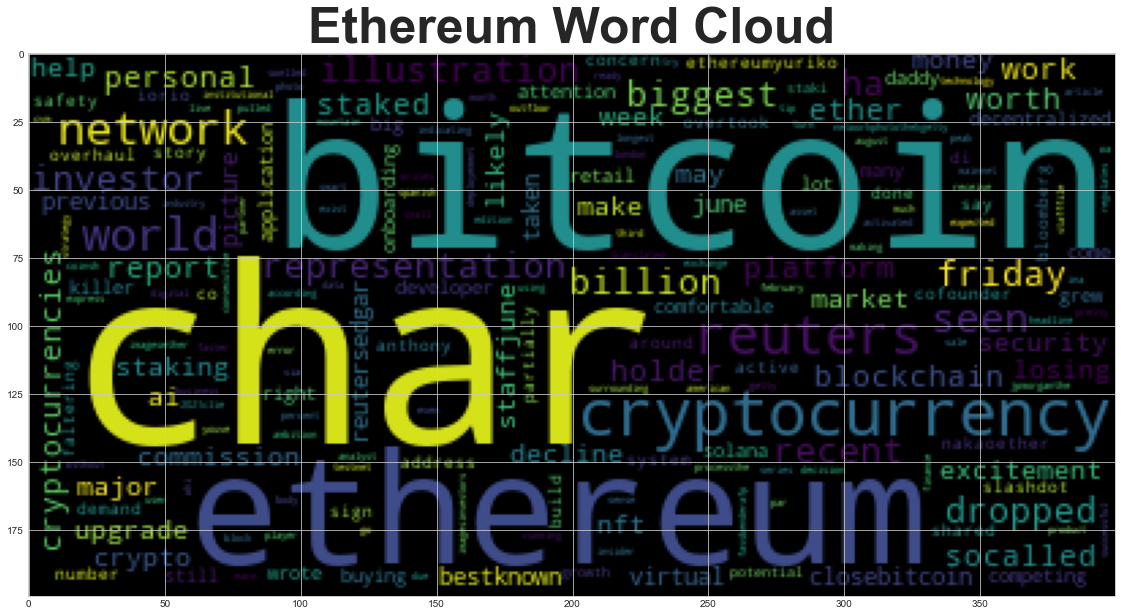

In [23]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(' '.join(eth_tokens))
plt.title("Ethereum Word Cloud", fontsize = 50, fontweight = 'bold')
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
btc_content = ' '.join(bitcoin_df['text'])
btc_content

'Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars] Filed under:\r\nThe supply chain attack has reached over a thousand organizations.\r\nIllustration by Alex Castro / The Verge\r\nThree days after ransomware attackers started the holiday weekend by comprom… [+3376 chars] image copyrightGetty Images\r\nThe gang behind a "colossal" ransomware attack has demanded $70m (£50.5m) paid in Bitcoin in return for a "universal decryptor" that it says will unlock the files of all … [+4140 chars] While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars] As longtime TechCrunch readers know well, Michael Arrington cofounded TechCrunch and Crunchbase, as well as the venture fund Crunch

In [28]:
# Run the NER processor on all of the text
doc = nlp(btc_content)

# Add a title to the document
doc.user_data["title"] = "NER for Bitcoin"

In [29]:
# Render the visualization
displacy.render(doc, style='ent')

In [30]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Reno GPE
El Salvador GPE
Aldo Baoicchi GPE
Canadian NORP
Daymak ORG
Alex Castro PERSON
The Verge ORG
Three days DATE
the holiday weekend DATE
copyrightGetty Images PERSON
$70m MONEY
£50.5m MONEY
Bitcoin and Ethereum ORG
2021 DATE
Michael Arrington PERSON
TechCrunch LOC
Crunchbase ORG
CrunchFund PRODUCT
Tuesday DATE
2017 DATE
LONDON GPE
June 23 DATE
Reuters ORG
El Salvador GPE
LONDON GPE
June 23 DATE
Reuters ORG
El Salvador GPE
Pr PERSON
earlier this year DATE
March 15, 2021 DATE
REUTERS ORG
Dado Ruvic/ PERSON
June 30 DATE
Reuters ORG
June 14, 2021 DATE
REUTERS ORG
Edgar Su/IllustrationJune 25 PERSON
Reuters ORG
7.37% PERCENT
32,094.44 MONEY
Reuters ORG
FILE ORG
June 7, 2021 DATE
REUTERS ORG
Edgar Su/Illustration/File Photo PERSON
Reuters ORG
+304 PERSON
James Martin/CNET PERSON
UK GPE
Spain GPE
Twitter PRODUCT
2020 DATE
the US Department of Justi ORG
Reuters ORG
June 25 DATE
Reuters ORG
7.37% PERCENT
32,094.44 MONEY
Friday DATE
2,554.88 MONEY
50.5 CARDINAL
May 19, 2021 DATE
REUTERS ORG

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
eth_content = ' '.join(ethereum_df['text'])
eth_content

'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars] While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars] Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther overtook bitcoin in the number of active addresses on its network on Friday, a sign that demand is faltering for the world\'s biggest cryptocurrency as its co… [+2727 chars] "Anthony Di Iorio, a co-founder of the Ethereum network, says he\'s done with the cryptocurrency world, partially because of personal safety concerns," reports Bloomberg, in a story shared by Slashdot… [+1550 chars] Ether holders have "staked" more than $13 billion worth of the cryptocurrency on the ethereum 2.0 network, as excitement builds aroun

In [32]:
# Run the NER processor on all of the text
doc = nlp(eth_content)

# Add a title to the document
doc.user_data["title"] = "NER for Ethereum"

In [33]:
# Render the visualization
displacy.render(doc, style='ent')

In [34]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Ethereum PERSON
Ethereum Killers WORK_OF_ART
Solana PERSON
Bitcoin and Ethereum ORG
2021 DATE
Yuriko Nakao PERSON
Friday DATE
Anthony Di Iorio PERSON
Ethereum PERSON
Bloomberg PERSON
Slashdot NORP
more than $13 billion MONEY
2.0 CARDINAL
Photothek PERSON
more than $13 billion MONEY
2.0 CARDINAL
$40 billion MONEY
2025 DATE
JPMorgan ORG
NFT ORG
90 percent PERCENT
recent weeks DATE
recent months DATE
American Express ORG
Spanish NORP
AI ORG
The Securities and Exchange Commission ORG
Reuters ORG
June 25 DATE
Reuters ORG
7.37% PERCENT
32,094.44 MONEY
Friday DATE
2,554.88 MONEY
50.5 CARDINAL
Getty Images
 ORG
the third week DATE
February 2018 DATE
London GPE
Ethereum PERSON
12 965 000 CARDINAL
August 3-5, 2021 DATE
Clie PERSON
Reuters ORG
FILE ORG
June 7, 2021 DATE
REUTERS ORG
Edgar Su/Illustration/File Photo PERSON
Reuters ORG
+304 PERSON
Reuters ORG
June 25 DATE
Reuters ORG
8.51% PERCENT
31,699.83 MONEY
22:04 GMT TIME
Friday DATE
2,937.27 MONEY
Hackaday DATE
Proof of Work WORK_OF_ART
Bitco

---